In [2]:
raw_data = pd.read_pickle(r'C:\Users\niels\OneDrive\Machine Learning 2022\Lecture 2\dataset.pkl')
data = raw_data[raw_data['market_cap'] > 1000.0]
data = data.copy()
data.fillna(0.0,inplace=True)

In [3]:
def f(x):
    if x > 0.01:
        return 1
    elif x < -0.025:
        return -1
    else:
    
        return 0

In [4]:
data['rel_performance'] = data['pred_rel_return'].apply(f)
data.reset_index(inplace=True)
data.set_index('date',inplace=True)

In [5]:
df = data.loc['2001-01-01':'2004-01-01']
df_valid = data.loc['2004-04-01':'2004-07-01']
df_test = data.loc['2004-10-01':'2005-01-01']

In [6]:
train = df.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)

valid = df_valid.reset_index().drop(['ticker','date',
                                    'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)
test = df_test.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)

In [7]:
train_stock_returns = df['next_period_return']
valid_stock_returns = df_valid['next_period_return']
test_stock_returns = df_test['next_period_return']

y_train = df['rel_performance']
y_valid = df_valid['rel_performance']
y_test = df_test['rel_performance']

y_train = y_train.values
y_valid = y_valid.values
y_test = y_test.values

## Importing Optuna

In [8]:
import optuna
from optuna.trial import Trial
# optuna.logging.set_verbosity(optuna.logging.FATAL)
# import warnings
# warnings.filterwarnings("ignore")

## Defining the Optuna objective function

In [16]:
def objective(trial:Trial,train=None,labels=None,val=None,val_labels=None,val_rets=None):

    rf_n_estimators = trial.suggest_int('n_estimators', 10,40,step=5)
    rf_max_features = trial.suggest_categorical('max_features',['sqrt','log2'])
    rf_min_samples_leaf = trial.suggest_int('min_samples_leaf',400,2400,step=400)
    rf_max_depth = trial.suggest_int('max_depth',5,25,step=5)
    
    rf_clf = RandomForestClassifier(n_estimators=rf_n_estimators,
                                    max_depth=rf_max_depth,
                                    min_samples_leaf=rf_min_samples_leaf,
                                    max_features=rf_max_features)
    rf_clf.fit(train,labels)
    preds = rf_clf.predict(val)
    profit = (preds * val_rets).sum()
 
    return profit

In [17]:
study = optuna.create_study(direction="maximize")

[I 2023-01-29 11:09:11,736] A new study created in memory with name: no-name-b5919024-3ec7-4408-a17a-391297a6d834


In [14]:
from functools import partial

In [19]:
%%time
study.optimize(partial(objective,train=train,labels=y_train,val=valid,val_labels=y_valid,val_rets=valid_stock_returns), n_trials=400,n_jobs=-1)

[I 2023-01-29 11:10:24,485] Trial 200 finished with value: -26.068305999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 131 with value: -11.031131999999975.
[I 2023-01-29 11:10:24,544] Trial 204 finished with value: -17.358129999999985 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 131 with value: -11.031131999999975.
[I 2023-01-29 11:10:24,571] Trial 206 finished with value: -26.068305999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 131 with value: -11.031131999999975.
[I 2023-01-29 11:10:24,635] Trial 202 finished with value: -20.48512599999999 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 131 with value: -11.031131999999975.
[I 2023-01-29 11:10:24,653] Trial 203 finished with value: -11.37

[I 2023-01-29 11:10:27,888] Trial 236 finished with value: -25.506319999999995 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 232 with value: -10.823525999999973.
[I 2023-01-29 11:10:27,974] Trial 237 finished with value: -23.334583999999985 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 232 with value: -10.823525999999973.
[I 2023-01-29 11:10:27,979] Trial 238 finished with value: -18.135099999999976 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 232 with value: -10.823525999999973.
[I 2023-01-29 11:10:28,014] Trial 239 finished with value: -10.856525999999976 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 232 with value: -10.823525999999973.
[I 2023-01-29 11:10:28,168] Trial 240 finished with value: -10.3

[I 2023-01-29 11:10:31,042] Trial 266 finished with value: -26.068305999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 10}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:31,194] Trial 268 finished with value: -17.933287999999983 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:31,318] Trial 271 finished with value: -19.156843999999978 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:31,349] Trial 270 finished with value: -13.611925999999976 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:31,461] Trial 272 finished with value: -26.0

[I 2023-01-29 11:10:34,571] Trial 302 finished with value: -16.28694599999998 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 5}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:34,708] Trial 304 finished with value: -15.92673199999998 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:34,781] Trial 303 finished with value: -26.068305999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:34,856] Trial 305 finished with value: -26.068305999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:35,142] Trial 306 finished with value: -17.9603

[I 2023-01-29 11:10:39,302] Trial 337 finished with value: -26.068305999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:39,566] Trial 339 finished with value: -18.20071799999998 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 20}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:39,593] Trial 338 finished with value: -25.008401999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:39,649] Trial 335 finished with value: -21.409531999999984 and parameters: {'n_estimators': 25, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:39,796] Trial 340 finished with value: -26.06

[I 2023-01-29 11:10:43,700] Trial 369 finished with value: -20.82048399999998 and parameters: {'n_estimators': 15, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:43,730] Trial 373 finished with value: -24.96638199999999 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:43,732] Trial 371 finished with value: -20.702963999999977 and parameters: {'n_estimators': 15, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:43,841] Trial 376 finished with value: -26.068305999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1200, 'max_depth': 10}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:44,047] Trial 374 finished with value: -19.23

[I 2023-01-29 11:10:47,992] Trial 404 finished with value: -21.973747999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:48,083] Trial 405 finished with value: -19.666141999999976 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:48,100] Trial 407 finished with value: -12.914647999999975 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:48,280] Trial 406 finished with value: -18.114731999999982 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 240 with value: -10.328269999999968.
[I 2023-01-29 11:10:48,408] Trial 408 finished with value: -15.5

[I 2023-01-29 11:10:51,878] Trial 438 finished with value: -17.630791999999975 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:10:52,151] Trial 439 finished with value: -15.925721999999977 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 20}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:10:52,175] Trial 440 finished with value: -26.068305999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:10:52,381] Trial 441 finished with value: -26.068305999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:10:52,410] Trial 442 finished with value: -15.61461

[I 2023-01-29 11:10:56,851] Trial 472 finished with value: -26.068305999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:10:56,983] Trial 473 finished with value: -14.435883999999978 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:10:57,119] Trial 474 finished with value: -26.068305999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:10:57,250] Trial 475 finished with value: -25.42885799999999 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:10:57,396] Trial 476 finished with value: -25.559007

[I 2023-01-29 11:11:01,436] Trial 505 finished with value: -19.010069999999974 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:11:01,626] Trial 506 finished with value: -14.671815999999973 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:11:01,791] Trial 508 finished with value: -26.068305999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:11:01,857] Trial 509 finished with value: -26.068305999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1600, 'max_depth': 25}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:11:02,045] Trial 511 finished with value: -16.0920

[I 2023-01-29 11:11:06,140] Trial 540 finished with value: -13.65187999999998 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:11:06,158] Trial 541 finished with value: -26.068305999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:11:06,391] Trial 544 finished with value: -26.068305999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1200, 'max_depth': 15}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:11:06,468] Trial 542 finished with value: -26.068305999999993 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:11:06,585] Trial 543 finished with value: -26.06830

[I 2023-01-29 11:11:10,915] Trial 574 finished with value: -24.63707599999999 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:11:10,989] Trial 576 finished with value: -19.394071999999987 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:11:11,078] Trial 571 finished with value: -20.301835999999987 and parameters: {'n_estimators': 15, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 25}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:11:11,418] Trial 577 finished with value: -16.67649599999998 and parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 400, 'max_depth': 15}. Best is trial 409 with value: -8.991529999999976.
[I 2023-01-29 11:11:11,448] Trial 578 finished with value: -26.0683059

CPU times: total: 2min 34s
Wall time: 49.6 s


In [20]:
study.best_params

{'n_estimators': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 400,
 'max_depth': 15}

In [21]:
rf_clf = RandomForestClassifier(**study.best_params)

In [22]:
rf_clf.fit(train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=400, n_estimators=10)

In [23]:
preds=rf_clf.predict(valid)

In [24]:
valid_profit = (preds * df_valid['next_period_return']).sum()
valid_profit

-17.070961999999977

In [25]:
pred_test=rf_clf.predict(test)

In [26]:
test_profit = (pred_test * df_test['next_period_return']).sum()
test_profit

89.373347

In [27]:
confusion_matrix(y_test,pred_test)

array([[  5,   0, 378],
       [  0,   0, 169],
       [  4,   0, 580]], dtype=int64)

In [28]:
accuracy_score(preds,y_valid)

0.5532467532467532

In [29]:
accuracy_score(pred_test,y_test)

0.5149647887323944

In [30]:
len(train.columns)

725

In [31]:
def randomforest_feat_importances(m, df):
        
    return pd.DataFrame({'cols':df.columns, 'feat_imp': m.feature_importances_}
                       ).sort_values('feat_imp', ascending=False)

def plot_fi(fi): return fi.plot('cols', 'feat_imp', 'barh', figsize=(12,7), legend=False)

In [33]:
fi = randomforest_feat_importances(rf_clf,train)

In [34]:
features = fi[(fi['feat_imp'] > 0.00)]

In [35]:
features.shape

(81, 2)

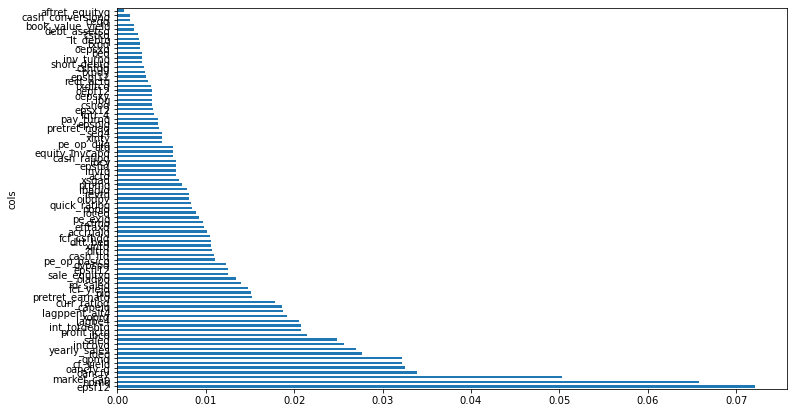

In [36]:
plot_fi(features);

In [29]:
features

,cols,feat_imp
153,capxq,0.052659
164,intcov_ratioq,0.045073
77,oepsxy,0.042410
83,xinty,0.041801
76,oancfy,0.041177
...,...,...
66,chechy,0.003569
129,lagppent_alt4,0.003513
71,dpcy,0.002826
158,lt_ppentq,0.002290


In [45]:
train = train[features['cols'].values]
valid = valid[features['cols'].values]
test = test[features['cols'].values]

In [46]:
cols = features['cols'].values

In [38]:
rf_clf.fit(train,y_train)
rf_clf.score(train,y_train)

0.5833256393684794

In [39]:
len(valid)

1155

In [40]:
pred_valid = rf_clf.predict(valid)
rf_clf.score(valid,y_valid)

0.5619047619047619

In [41]:
(pred_valid * valid_stock_returns).sum()

-11.983885999999973

In [42]:
Counter(pred_valid)

Counter({1: 1130, -1: 25})

In [48]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()

In [49]:
train_red =pd.DataFrame(data = scaler.fit_transform(train.values),columns = cols)
valid_red =pd.DataFrame(data = scaler.transform(valid.values),columns = cols)
test_red = pd.DataFrame(data = scaler.transform(test.values),columns = cols)

In [50]:
valid_1 = valid_red.copy()

valid_1['rets'] = df_valid['next_period_return'].values

In [43]:
import shap

In [53]:
def model(features):
    tree_features = features[features.columns[:-1].values]

    pred = rf_clf.predict(tree_features)

    ret = pred * features[features.columns[-1]]

    return ret

In [54]:
explainer = shap.explainers.Permutation(model,valid_1)

In [55]:
shap_values = explainer(valid_1,max_evals=2000,)

Permutation explainer: 1156it [07:16,  2.58it/s]                                                                       


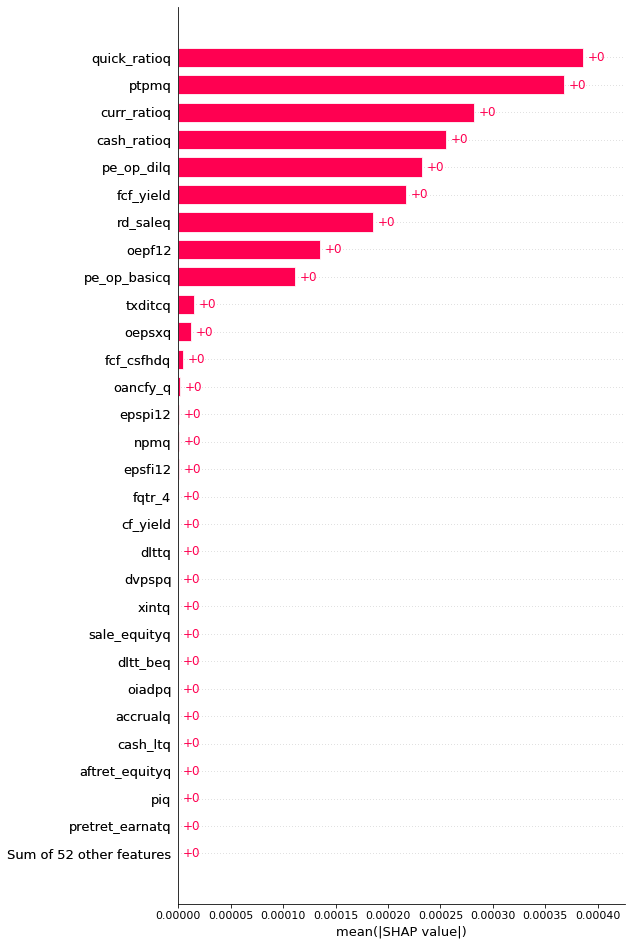

In [56]:
shap.plots.bar(shap_values[:,:-1],max_display=30)

In [57]:
shap_cols = cols[np.abs(shap_values[:,:-1].values).mean(axis=0)>0.000]
shap_cols

array(['npmq', 'oancfy_q', 'cf_yield', 'curr_ratioq', 'fcf_yield',
       'rd_saleq', 'epsfi12', 'pe_op_basicq', 'fcf_csfhdq',
       'quick_ratioq', 'ptpmq', 'cash_ratioq', 'pe_op_dilq', 'fqtr_4',
       'oepf12', 'txditcq', 'epspi12', 'oepsxq'], dtype=object)

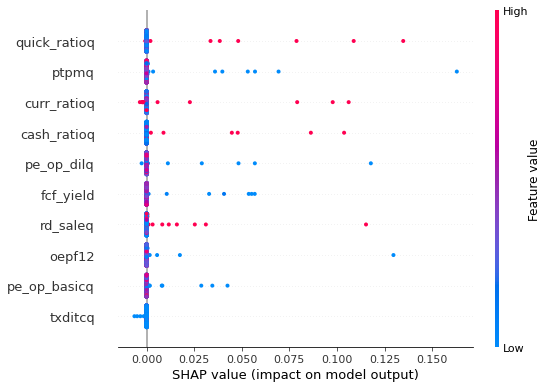

In [58]:
shap.summary_plot(shap_values[:,:-1], features=valid_1[valid_1.columns[:-1]],max_display=10)

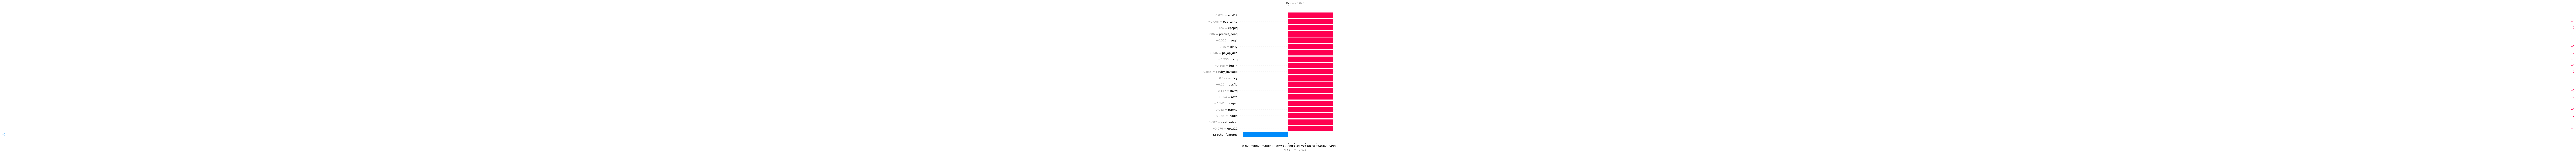

In [60]:
shap.plots.waterfall(shap_values[1000,:-1],max_display=20)

In [61]:
rf_clf.fit(train[shap_cols],y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=400, n_estimators=10)

In [62]:
test_set = test_red[shap_cols]
pred_test = rf_clf.predict(test_set)
# pred_test_avr = pred_test_avr/np.abs(pred_test_avr).sum()
(pred_test * df_test['next_period_return']).sum()

89.55869100000001

## Long term performance with Random Forest Classifier, optimal hyper-parameters

In [63]:
start_dates = [pd.to_datetime('2001-01-01') + pd.DateOffset(months = 3*i) for i in range(57)]
end_dates = [d + pd.DateOffset(months = 36) for d in start_dates]

In [64]:
training_frames = [data.loc[d:d+pd.DateOffset(months = 36)] for d in start_dates]
valid_frames = [data.loc[d:d+pd.DateOffset(months = 3)] for d in end_dates]
test_frames = [data.loc[d+pd.DateOffset(months = 6):d+pd.DateOffset(months = 9)] for d in end_dates]

In [65]:
training_data = [d.reset_index().drop
                                 (['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1) for d in training_frames]

In [66]:
test_data = [d.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1) for d in test_frames]

In [69]:
training_labels = [d['rel_performance'].values for d in training_frames]

In [70]:
scalers = [StandardScaler() for _ in range(len(training_data))]
           
opt_training_data = [pd.DataFrame(scalers[i].fit_transform(training_frames[i][shap_cols].values),columns=shap_cols) for i in range(len(training_data))]
opt_test_data = [pd.DataFrame(scalers[i].transform(test_frames[i][shap_cols].values),columns=shap_cols) for i in range(len(test_data))]

In [71]:
x = [1]
ret = []

for i in range(len(start_dates)-1):
        rf_clf.fit(opt_training_data[i],training_labels[i])

        preds = rf_clf.predict(opt_test_data[i])
        profit_i = (preds*test_frames[i]['next_period_return']).sum()
        ret.append(profit_i)
        num_names = len(opt_test_data[i])
        x.append(x[i] + (x[i]/num_names)*profit_i)

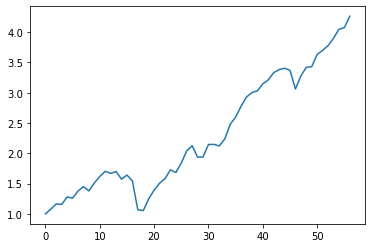

In [72]:
plt.plot(x);

In [63]:
len(x)

63

In [74]:
SPY = pd.read_pickle(r'C:\Users\niels\OneDrive\Machine Learning 2022\Lecture 2\SPY_cum_ret.pkl')
SPY = SPY.loc['2004-07-01':'2018-09-30']
SPY = SPY.resample('Q').ffill()
SPY['spy_cum_ret'] = (SPY['spy_cum_ret'] - SPY['spy_cum_ret'][0] + 1)
SPY['strategy'] = x

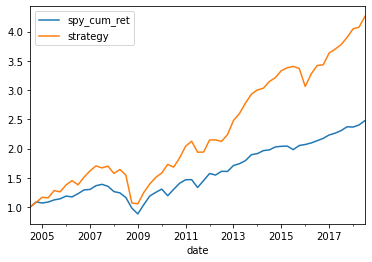

In [75]:
SPY.plot();

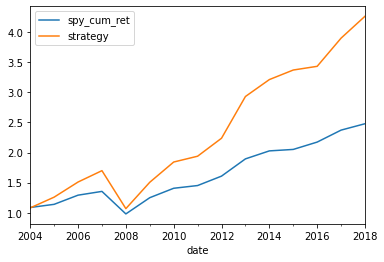

In [76]:
SPY = SPY.resample('Y').ffill()
SPY.plot();

In [77]:
strategy_mean_ret = (SPY['strategy'] - 1).diff().mean()
strategy_std = (SPY['strategy'] - 1).diff().std()
strategy_sr = strategy_mean_ret/strategy_std
print('Strategy Sharpe Ratio: ',strategy_sr)

Strategy Sharpe Ratio:  0.7652514211534036


In [78]:
x[-1]

4.262045849690193

In [79]:
SPY['spy_cum_ret'][-1]

2.4779340000000003

In [80]:
strategy_ret = (SPY['strategy'] - 1).diff().values[1:]
spy_ret = (SPY['spy_cum_ret'] - 1).diff().values[1:]

In [81]:
beta = (np.cov(spy_ret,strategy_ret)/np.var(spy_ret))[1,0]

In [82]:
beta

1.9441808350838654

In [83]:
residual_ret = strategy_ret - beta * spy_ret

In [84]:
IR = np.mean(residual_ret)/np.std(residual_ret)

In [85]:
IR

0.38945097506712334

In [86]:
alpha = np.mean(residual_ret)

In [87]:
alpha

0.03413158072520357